<font color='blue' size=5>План:  

- SVC (разные функции потерь)
- Где вероятности?
- Nu-SVC
- SVR

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC, NuSVC, SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Squared Hinge Loss или  Hinge Loss

<font color='2356470'>**SVM (Support Vector Machine)**

Loss function (функции потерь):
 - hinge
 - squared_hinge

`hinge` и `squared_hinge` — это два типа функций потерь, используемых в SVM для задачи классификации. Они определяют, как штрафуются ошибки классификации и как модель обучается.

<font color='2356470'>**Функция `hinge`**

$$L(y, f(\mathbf{x})) = \max(0, 1 - y \cdot f(\mathbf{x})),$$
где:
- $ y $ — истинная метка класса, которая принимает значения {-1, 1}.
- $f(\mathbf{x})$ — прогнозируемое значение модели.

Функция потерь hinge применяется в классическом SVM. Она штрафует неправильные классификации и корректные классификации, которые находятся слишком близко к разделяющей гиперплоскости (зона зазора).
Если $ y \cdot f(\mathbf{x}) \geq 1 $, то штраф равен нулю, что означает, что классификация правильная и находится вне зазора.
Если $y \cdot f(\mathbf{x}) < 1$, то штраф положителен, и значение штрафа растет линейно по мере удаления $ f(\mathbf{x}) $ от правильного значения $ y $.

<font color='2356470'>**Функция Squared Hinge Loss**

$$
L(y, f(\mathbf{x})) = \max(0, 1 - y \cdot f(\mathbf{x}))^2
$$

Squared hinge loss является вариацией hinge loss, где штраф возводится в квадрат.
Так же, как и в случае с hinge loss, штраф равен нулю, если $ y \cdot f(\mathbf{x}) \geq 1 $.
Если $ y \cdot f(\mathbf{x}) < 1 $, то штраф растет квадратично по мере удаления $ f(\mathbf{x}) $ от правильного значения $ y $. Это делает функцию потерь более чувствительной к ошибкам, так как штраф увеличивается быстрее по сравнению с линейной hinge loss.


<font color='2356470'>**Сравнение**

- Чувствительность к ошибкам : Squared hinge loss более чувствителен к большим ошибкам, так как штраф возрастает квадратично, в то время как hinge loss растет линейно.
- Использование squared hinge loss может привести к более жестким границам разделения и потенциально лучше обобщающей модели, но также может увеличивать время обучения и сложность модели.

In [3]:

# Создание двумерных данных для классификации
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
# Добавление выбросов
np.random.seed(42)
n_outliers = 10
outliers = np.random.uniform(low=-6, high=6, size=(n_outliers, 2))
X_with_outliers = np.vstack([X, outliers])
y_with_outliers = np.hstack([y, [1]*n_outliers])  # Классифицируем выбросы как -1


In [4]:
np.unique(y_with_outliers)

array([0, 1])

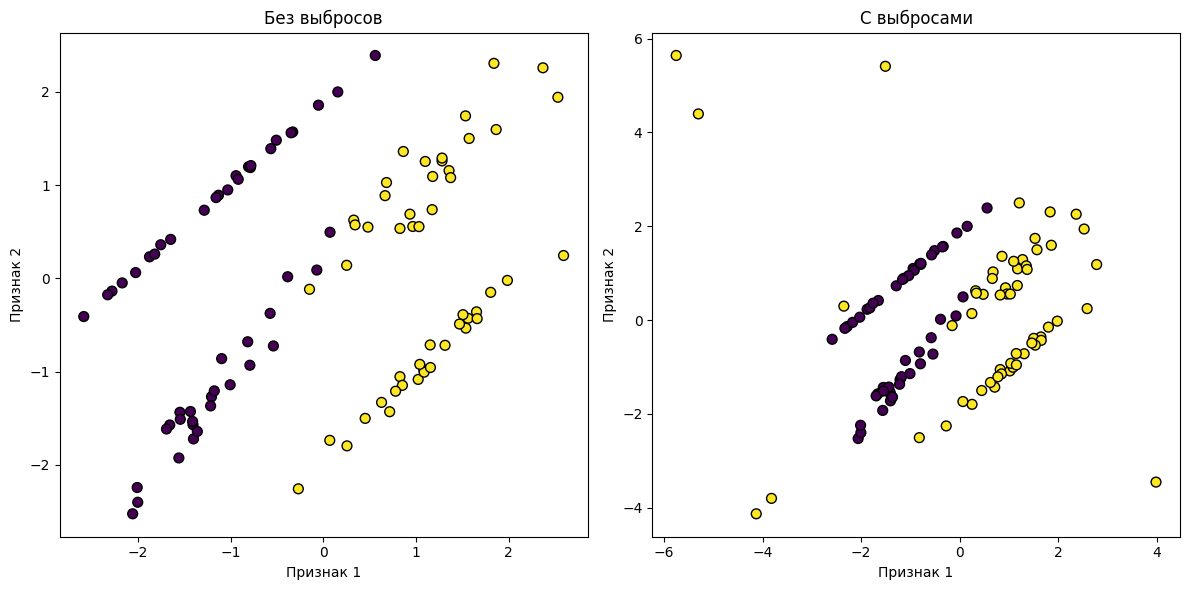

In [5]:
# Построение графиков
plt.figure(figsize=(12, 6))

# График без выбросов
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Без выбросов")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

# График с выбросами
plt.subplot(1, 2, 2)
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c=y_with_outliers, cmap='viridis', edgecolor='k', s=50)
plt.title("С выбросами")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

plt.tight_layout()
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_with_outliers, y_with_outliers, test_size=0.3, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


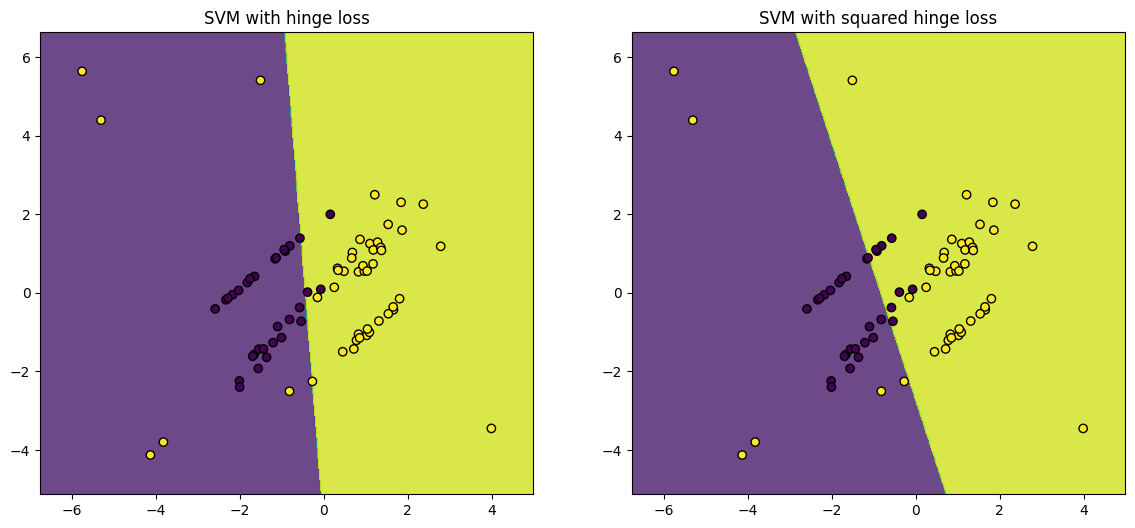

Metrics for SVM with hinge loss:
Accuracy: 0.7878787878787878
Precision: 0.6842105263157895
Recall: 0.9285714285714286
F1 Score: 0.7878787878787878
-----------------------------------
Metrics for SVM with squared hinge loss:
Accuracy: 0.696969696969697
Precision: 0.5909090909090909
Recall: 0.9285714285714286
F1 Score: 0.7222222222222223


In [7]:

# Функция для построения графиков разделяющих прямых
# Функция для построения графиков разделяющих прямых
def plot_decision_boundaries(X, y, clf, title, ax):
    h = .02  # Шаг сетки
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(title)

# Обучение и визуализация для 'hinge'
clf_hinge = LinearSVC(loss='hinge')
clf_hinge.fit(X_train, y_train)


# Обучение и визуализация для 'squared_hinge'
clf_squared_hinge = LinearSVC(loss='squared_hinge')
clf_squared_hinge.fit(X_train, y_train)

# Создание подграфиков
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_boundaries(X_train, y_train, clf_hinge, 'SVM with hinge loss', axes[0])
plot_decision_boundaries(X_train, y_train, clf_squared_hinge, 'SVM with squared hinge loss', axes[1])
plt.show()

# Оценка качества моделей
def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, precision, recall, f1, cm, report

accuracy_hinge, precision_hinge, recall_hinge, f1_hinge, cm_hinge, report_hinge = evaluate_model(clf_hinge, X_test, y_test)
accuracy_squared_hinge, precision_squared_hinge, recall_squared_hinge, f1_squared_hinge, cm_squared_hinge, report_squared_hinge = evaluate_model(clf_squared_hinge, X_test, y_test)

print("Metrics for SVM with hinge loss:")
print("Accuracy:", accuracy_hinge)
print("Precision:", precision_hinge)
print("Recall:", recall_hinge)
print("F1 Score:", f1_hinge)

print("-----------------------------------")
print("Metrics for SVM with squared hinge loss:")
print("Accuracy:", accuracy_squared_hinge)
print("Precision:", precision_squared_hinge)
print("Recall:", recall_squared_hinge)
print("F1 Score:", f1_squared_hinge)


# Вероятности

In [8]:
clf_hinge.predict(X_train)

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [9]:
clf_hinge.predict_proba(X_train)
# должен упасть с ошибкой, так как по умолчанию вероятностей SVM не выдает

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

<font color='red'> как алгоритм SVM не может прогнозировать вероятности

SVM изначально не предоставляет вероятностных оценок для классификации. Однако существует метод, который позволяет получать такие оценки, называемый калибровкой вероятностей. Наиболее популярным подходом является использование [Platt Scaling](https://medium.com/@chandu.bathula16/machine-learning-concept-68-platts-scaling-b8245421739e). Как это работает:

1. Сначала обучается обычная модель SVM. При обучении SVM мы получаем разделяющую гиперплоскость и соответствующие значения для каждого наблюдения (decision values).

2. После обучения модели SVM для каждого обучающего образца вычисляются значения решения (decision values), которые равны расстоянию от точки до разделяющей гиперплоскости. Эти значения могут быть как положительными, так и отрицательными, в зависимости от того, по какую сторону гиперплоскости находится точка.

3. Далее эти decision values используются в качестве входных данных для обучения логистической регрессии. Логистическая регрессия обучается с использованием меток классов как целевых значений.
      $$
      P(y=1 | f) = \frac{1}{1 + \exp(A f + B)}
      $$
      где $P(y=1 | f)$ — вероятность принадлежности класса $y=1$ для decision value $f$, $A$ и $B$ — параметры, которые подбираются в процессе обучения логистической регрессии.

4. После обучения параметров $A$ и $B$ логистической регрессии можно использовать эту модель для преобразования decision values в вероятности.


In [10]:
# Обучение и визуализация для 'hinge'
clf_svc = SVC(probability=True, kernel='linear')
clf_svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [10]:
clf_svc.predict_proba(X_test)[:3,:]

array([[0.55787667, 0.44212333],
       [0.09139736, 0.90860264],
       [0.16806123, 0.83193877]])

# NuSVC

Параметр $\nu$ в <font color='green'>**Nu-Support Vector Classification (Nu-SVC)**

определяет баланс между сложностью модели и точностью, по сути он осуществляет  контроль над числом опорных векторов и ошибками на обучающей выборке.

Когда $\nu = 0.5$, это означает следующее:

1. Параметр $\nu = 0.5$ устанавливает, что не более 50% обучающих данных могут быть ошибочно классифицированы или находиться внутри полосы. Другими словами, модель допускает, что до половины обучающих точек могут быть либо неправильно классифицированы, либо лежать внутри полосы.

2. Также параметр $\nu = 0.5$ также устанавливает, что как минимум 50% обучающих данных должны быть опорными векторами. Это означает, что половина всех обучающих точек будут влиять на формирование разделяющей гиперплоскости.

In [11]:
# Создание модели NuSVC с nu=0.5
clf_nusvc = NuSVC(nu=0.5, kernel='rbf')

# Обучение модели на обучающих данных
clf_nusvc.fit(X_train, y_train)

# Прогнозирование на новых данных
predictions = clf_nusvc.predict(X_test)


# SVR

svm_regressor c epsilon = 1 и коэффициентам = [[-0.29596472]], [0.85582894]
svm_regressor c epsilon = 2 и коэффициентам = [[0.]], [0.23137417]
линейная регрессия с коэффициентам = [-0.36292135], 1.001755740136677


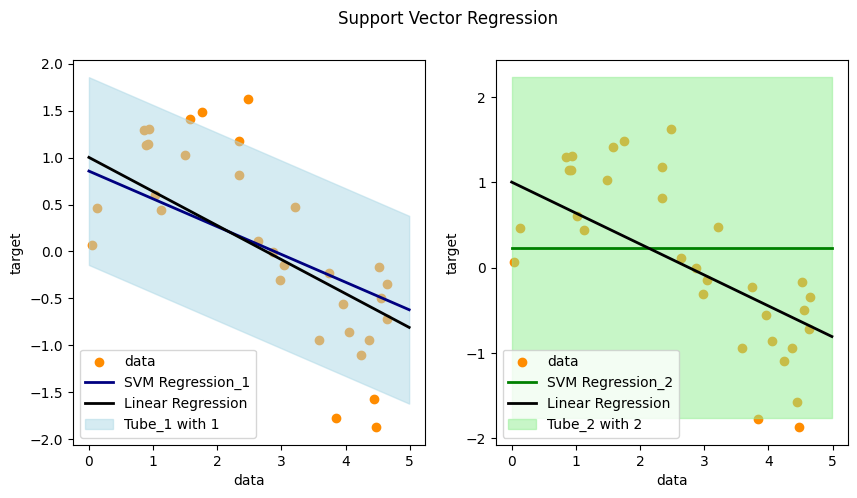

In [13]:
# Создаем данные
np.random.seed(12345)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()  # Истинная зависимость

# Добавление шума к данным
y += 0.5 * np.random.randn(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

# Задаем параметры epsilon
epsilon_1= 1
epsilon_2 = 2

# Обучаем SVM для регрессии
svm_regressor_1 = SVR(kernel='linear', C=1.0, epsilon=epsilon_1)
svm_regressor_1.fit(X_train, y_train)

svm_regressor_2 = SVR(kernel='linear', C=1.0, epsilon=epsilon_2)
svm_regressor_2.fit(X_train, y_train)

# обучим линейную регрессию
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Создаем тестовые данные для предсказания
X_new = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]


# Получаем предсказания
y_pred_1 = svm_regressor_1.predict(X_new)
y_pred_2 = svm_regressor_2.predict(X_new)
y_pred_lin = lin_model.predict(X_new)


# Выводим коэффициенты
print(f'svm_regressor c epsilon = {epsilon_1} и коэффициентам = {svm_regressor_1.coef_}, {svm_regressor_1.intercept_}')
print(f'svm_regressor c epsilon = {epsilon_2} и коэффициентам = {svm_regressor_2.coef_}, {svm_regressor_2.intercept_}')
print(f'линейная регрессия с коэффициентам = {lin_model.coef_}, {lin_model.intercept_}')

fig = plt.figure(figsize=(10,5))
# Визуализируем результаты
plt.subplot(1,2,1)
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_new, y_pred_1, color='navy', lw=2, label='SVM Regression_1')
plt.plot(X_new, y_pred_lin, color='black', lw=2, label='Linear Regression')
# Отрисовка трубки
plt.fill_between(X_new.ravel(),
                 y_pred_1 - svm_regressor_1.epsilon,
                 y_pred_1 + svm_regressor_1.epsilon,
                 color='lightblue', alpha=0.5, label=f'Tube_1 with {epsilon_1}')
plt.legend(loc='lower left')
plt.xlabel('data')
plt.ylabel('target')
plt.subplot(1,2,2)
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_new, y_pred_2, color='green', lw=2, label='SVM Regression_2')
plt.plot(X_new, y_pred_lin, color='black', lw=2, label='Linear Regression')
# Отрисовка трубки
plt.fill_between(X_new.ravel(),
                 y_pred_2 - svm_regressor_2.epsilon,
                 y_pred_2 + svm_regressor_2.epsilon,
                 color='lightgreen', alpha=0.5, label=f'Tube_2 with {epsilon_2}')

plt.xlabel('data')
plt.ylabel('target')
plt.suptitle('Support Vector Regression')
plt.legend(loc='lower left')
plt.show()


Если значение `epsilon` в методе опорных векторов для задачи регрессии (SVR) выбрано слишком большим, это будет означать, что модель **станет более толерантной к ошибкам** и допустит большие отклонения между предсказанными значениями и истинными целевыми значениями.



In [13]:
import numpy as np
import plotly.graph_objects as go
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import GridSearchCV

# Создание искусственных данных
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()  # Истинная зависимость

# Добавление шума к данным
y += 0.5 * np.random.randn(len(y))
y[10] = 40
y[11] = 35
y[30] = 35
y[14] = 40
y[12] = 35
y[31] = 35




# Обучение SVR с линейным ядром и трубкой (epsilon=0.1)
# Определение сетки гиперпараметров для SVR
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.01, 0.1, 1, 10],
    'kernel': ['linear']
}

# Создание модели SVR
svr = SVR()

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Обучение моделей с подбором гиперпараметров
grid_search.fit(X, y)

# Вывод лучших параметров и наименьшей ошибки
print("Лучшие параметры: ", grid_search.best_params_)
print("Наименьшая ошибка: ", -grid_search.best_score_)

# Обучение модели с лучшими параметрами
svr_linear = grid_search.best_estimator_
svr_linear.fit(X, y)


# Обучение линейной регрессии
lin_model = LinearRegression()
lin_model.fit(X, y)

# Обучение Huber регрессии
huber_model = HuberRegressor()
huber_model.fit(X, y)

# Создание сетки для построения графика
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

# Предсказание для сетки
y_pred_svr = svr_linear.predict(X_test)
y_pred_lin = lin_model.predict(X_test)
y_pred_huber = huber_model.predict(X_test)

# Построение графика с Plotly
fig = go.Figure()

# Добавление данных
fig.add_trace(go.Scatter(x=X.ravel(), y=y, mode='markers', name='Данные', marker=dict(color='darkorange')))
fig.add_trace(go.Scatter(x=X_test.ravel(), y=y_pred_lin, mode='lines', name='Линейная регрессия', line=dict(color='green')))
fig.add_trace(go.Scatter(x=X_test.ravel(), y=y_pred_svr, mode='lines', name='SVR (Линейное ядро)', line=dict(color='navy')))
fig.add_trace(go.Scatter(x=X_test.ravel(), y=y_pred_huber, mode='lines', name='Huber регрессия', line=dict(color='red')))

# Настройки графика
fig.update_layout(
    title='Сравнение моделей регрессии',
    xaxis_title='Данные',
    yaxis_title='Целевые значения',
    legend=dict(x=5, y=1),
)

fig.show()


Лучшие параметры:  {'C': 1000, 'epsilon': 0.01, 'kernel': 'linear'}
Наименьшая ошибка:  94.65535243469643


При малых количествах выбросов SVR более устойчив

In [14]:
y_pred_svr[:3]


array([1.50181301, 1.49687019, 1.49192737])

In [15]:
y_pred_huber[:3]

array([1.48606115, 1.48099918, 1.47593721])